# 基于paddle的简单神经网络搭建-以心脏病的预测为例


## 一、项目背景介绍  

随着对机器学习的学习，对更进一步的深度学习产生了浓厚的兴趣，并尝试使用了一些开发套件进行深度学习的尝试，但由于使用的是现成的套件，对神经网络的原理以及过程并不能详细的了解。为了更进一步的学习，笔者尝试手动搭建一个简单的神经网络并训练使用。

## 二、数据集介绍
本文以心脏病发展分析和预测数据集为例，搭建神经网络对心脏病的发作进行预测。 
- 数据集来源：[数据集链接](https://aistudio.baidu.com/aistudio/datasetdetail/99207)； 
- 特征含义:
   - age 年龄
   - sex 性别 1=male,0=female
   - cp  胸痛类型(4种) 值1:典型心绞痛，值2:非典型心绞痛，值3:非心绞痛，值4:无症状
   - trbps 静息血压（毫米汞柱） 
   - chol 通过 BMI 传感器获取的以 mg/dl 为单位的胆甾醇
   - fbs （空腹血糖 > 120 mg/dl）（1 = 真；0 = 假）
   - restecg 静息心电图结果 值0：正常  值1：ST-T 波异常（T 波倒置和/或 ST 段抬高或压低 > 0.05 mV）  
    值2：根据埃斯蒂斯标准显示可能或明确的左心室肥厚
   - thalach 达到的最大心率
   - exng 运动诱发的心绞痛(1=yes;0=no)
   - oldpeak 相对于休息的运动引起的ST值(ST值与心电图上的位置有关)
   - slp 运动高峰ST段的坡度 Value 1: upsloping向上倾斜, Value 2: flat持平, Value 3: downsloping向下倾斜
   - caa  主血管数量 (0-3)
   - thall 一种叫做地中海贫血的血液疾病(3 =正常;6 =固定缺陷;7 =可逆转缺陷)
   - output 是否会发作(0=no,1=yes)'''
- 数据集展示

In [1]:
#解压数据集至work文件夹
!unzip '/home/aistudio/data/data99207/心脏病发作分析和预测数据集.zip' -d work/ -y
import pandas as pd
data = pd.read_csv('./work/heart.csv')
#数据展现
data.head()

Archive:  /home/aistudio/data/data99207/心脏病发作分析和预测数据集.zip
caution: filename not matched:  -y


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 三、模型介绍
本文旨在学习手写搭建神经网络的完整过程，所以仅使用了一个简单的神经网络，当需要使用更为复杂的网络时，仅需对网络的定义进行调整。   
这里简单介绍一下神经网络的原理，神经网络由众多神经元构成。它可以接受来自其他神经元的输入或者是外部的数据，然后计算一个输出。神经元的计算过程如图所示：
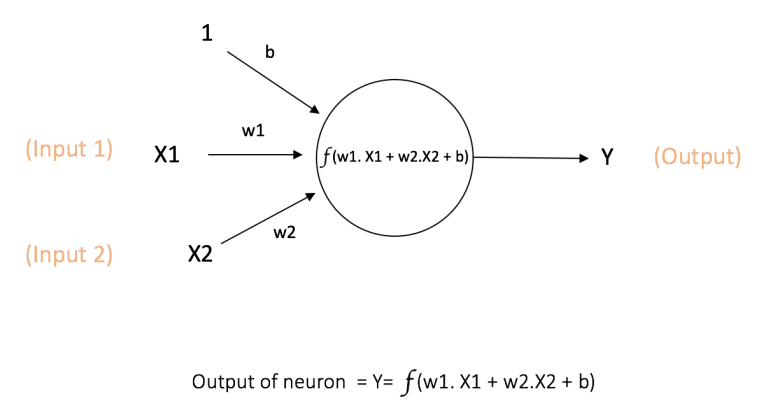
当众多神经元排列连接，构成了神经网络中的层，层与层相互连接构成了最为简单的神经网络，如图所示：
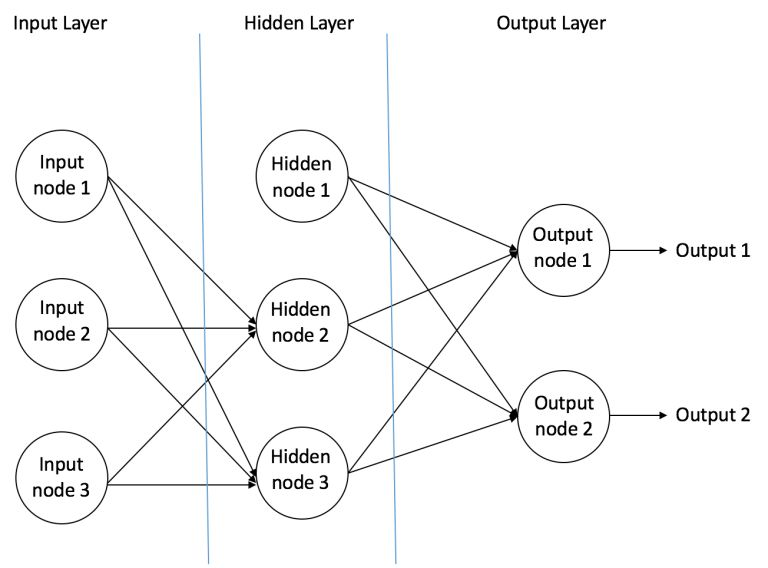
当然只有前向的传播计算是不够的，各个神经元之间需要用损失函数来计算训练结果与实际的误差，再通过优化器（即各种梯度下降的方法）来更新权值，这就是反向传播的过程。这个过程会不断的重复，直到误差低于我们设定好的要求。这时一整个神经网络的计算就完成了。
下图展示了一个MLP的反向传播的过程：
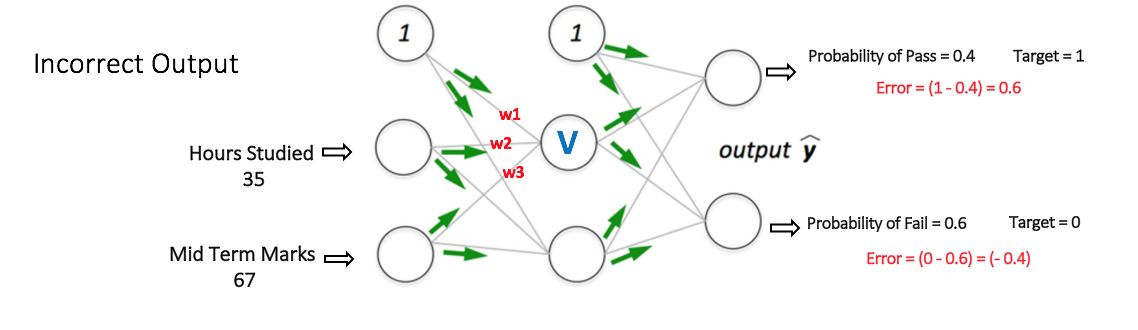

## 四、 数据处理
在训练各种模型时，对数据的处理与探索是非常重要的一环，直接影响的模型的训练速度和精度，所以笔者单独列出对数据的处理过程进行展示

- 数据集缺失情况检查  

我们实际应用的数据常常会碰到缺失与异常的情况，所以对数据集进行缺失与异常的检查并进一步处理是必要的。  
本文由于数据是完整的，并没有展示对缺失值与异常值处理的过程

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import paddle

#数据缺失值检查
print(data.isnull().sum())

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


- 数据统计量概览  

在完成数据的完整性检查后，我们还需要对数据有一个初步的了解，本文只选择了数据的统计量进行简单的查看。

In [3]:
#数据统计量展现
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


- 数据相关性检查  
对数据进行相关性检查，能让我们初步了解数据集各个特征间的关系，这会对我们选择神经网络的结构有所帮助

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/colors.py:101: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  ret = np.asscalar(ex)


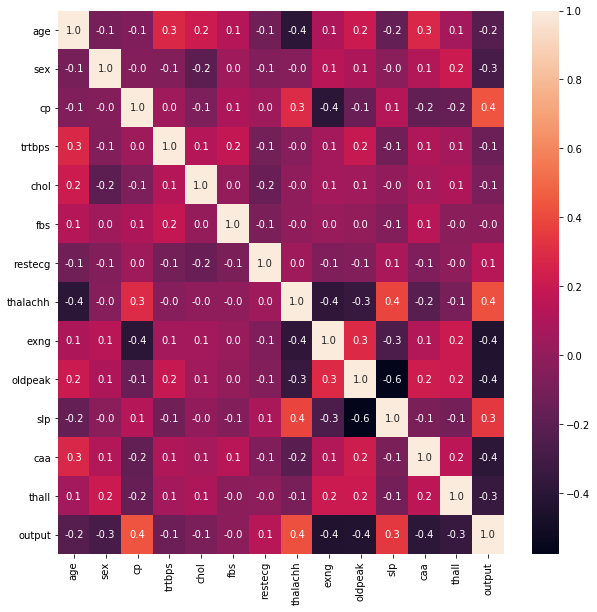

In [4]:
#相关性热图，以初步查看自变量对结果的影响程度
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

- 数据结构处理  

在对数据有进一步的了解之后，我们需要对数据的结构进行处理，以方便其对神经网络进行输入，并且需要根据实际的需求，对数据进行增广、压缩、增强等操作，目的是为了模型更为高效。

In [5]:
#由于cp,restecg,slp,thall是非顺序型的多分类变量，需进行进行独热编码
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['restecg'], prefix = "restecg")
c = pd.get_dummies(data['slp'], prefix = "slope")
d = pd.get_dummies(data['thall'], prefix = "thall")
data = pd.concat([data,a,b,c,d], axis = 1)
data = data.drop(columns = ['cp','restecg','slp', 'thall'])
data.head()


,age,sex,trtbps,chol,fbs,thalachh,exng,oldpeak,caa,output,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thall_0,thall_1,thall_2,thall_3
0,63,1,145,233,1,150,0,2.3,0,1,...,1,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,1,...,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.4,0,1,...,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,1,0,0,0,1,0,0,1,0


In [6]:
#最后对数据集进行划分，并归一化，完成数据预处理
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data.drop(['output'], axis = 1)#删除['outout']特征
y = data.output.values
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=6)  #随机种子6，划分训练集与测试集
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)#对训练集与测试集归一化，使模型能更好的收敛
y_train=y_train.reshape(y_train.shape[0],1)
y_test=y_test.reshape(y_test.shape[0],1)#由于在计算模型的评价指标时（x,）的数据会报错，所以需要进行转换

## 五、模型训练

In [7]:
#定义网络
class Net(paddle.nn.Layer):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = paddle.nn.Linear(in_features=23,out_features=100)
        self.fc2 = paddle.nn.Linear(in_features=100,out_features=100)
        self.fc3 = paddle.nn.Linear(in_features=100,out_features=2)#输出向量的维度需要根据分类结果进行选择


    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2(x)
        x=self.fc3(x)
        return x
net=Net()


W0223 00:07:17.249727  4104 device_context.cc:447] Please NOTE: device: 0, GPU Compute Capability: 7.0, Driver API Version: 10.1, Runtime API Version: 10.1
W0223 00:07:17.254323  4104 device_context.cc:465] device: 0, cuDNN Version: 7.6.


In [26]:
#超参数设置
# 设置迭代次数
epochs = 6
#损失函数：交叉熵
loss_func = paddle.nn.CrossEntropyLoss()
#优化器
opt = paddle.optimizer.Adam(learning_rate=0.1,parameters=net.parameters())

In [29]:
#训练程序
for epoch in range(epochs):
    all_acc = 0
    for i in range(X_train.shape[0]):
        x = paddle.to_tensor([X_train[i]],dtype="float32")
        y = paddle.to_tensor([y_train[i]],dtype="int64")
        infer_y = net(x)
        loss = loss_func(infer_y,y)
        loss.backward()
        acc= paddle.metric.accuracy(infer_y,y)
        all_acc=all_acc+acc.numpy()
        opt.step()
        opt.clear_gradients#清除梯度
        #print("epoch: {}, loss is: {},acc is:{}".format(epoch, loss.numpy(),acc.numpy()))由于输出过长，这里注释掉了
    print("第{}次正确率为：{}".format(epoch+1,all_acc/i))

第1次正确率为：[0.7300885]
第2次正确率为：[0.8053097]
第3次正确率为：[0.8362832]
第4次正确率为：[0.7920354]
第5次正确率为：[0.71681416]
第6次正确率为：[0.84513277]


## 六、模型评估

In [30]:
#测试集数据运行
net.eval()#模型转换为测试模式
all_acc = 0
for i in range(X_test.shape[0]):
        x = paddle.to_tensor([X_test[i]],dtype="float32")
        y = paddle.to_tensor([y_test[i]],dtype="int64")
        infer_y = net(x)
    # 计算损失与精度
        loss = loss_func(infer_y, y)
        acc = paddle.metric.accuracy(infer_y, y)
        all_acc = all_acc+acc.numpy()
    # 打印信息
        #print("loss is: {}, acc is: {}".format(loss.numpy(), acc.numpy()))
print("测试集正确率：{}".format(all_acc/i))

测试集正确率：[0.84]


In [20]:
#预测结果展示
net.eval()
x = paddle.to_tensor([X_train[1]],dtype="float32")
y = paddle.to_tensor([y_train[1]],dtype="int64")
infer_y = net(x)
# 计算损失与精度
loss = loss_func(infer_y, y)
# 打印信息
print("X_train[1] is :{}\n y_train[1] is :{}\n predict is {}".format(X_train[1],y_train[1],np.argmax(infer_y.numpy()[0])))

X_train[1] is :[-1.48235364 -1.49761715 -1.12562388  0.45148196 -0.382707    0.96548999
  1.46723474 -0.89784884 -0.6964023  -0.92771533 -0.44128998  1.54533482
 -0.29346959  0.99560437 -0.96110812 -0.13392991 -0.27537136 -0.93596638
  1.07791686 -0.0942809  -0.23624977  0.91139737 -0.8030738 ]
 y_train[1] is :[1]
 predict is 1


可以看到，模型在训练集上的准确率为0.845，在测试集上的准确率在0.84，并且我们抽取了一个数据进行预测，进行更为直观的展示，模型的预测结果与实际相符。

## 七、总结与升华
本文对一个项目使用神经网络建模并预测使用的过程进行了一个较为完整的展示，包括了数据探索，数据处理，模型训练，模型评价等，并且在使用神经网络时采取了使用基础api进行组网的方式，希望能对刚了解深度学习并想要尝试的同学有所启发

## 八、个人总结

> 浙江工业大学之江学院 理学院 数据科学与大数据技术专业 2019级 本科生 汪哲瑜  

我在AI Studio上获得青铜等级，点亮1个徽章，来互关呀~ https://aistudio.baidu.com/aistudio/personalcenter/thirdview/761690
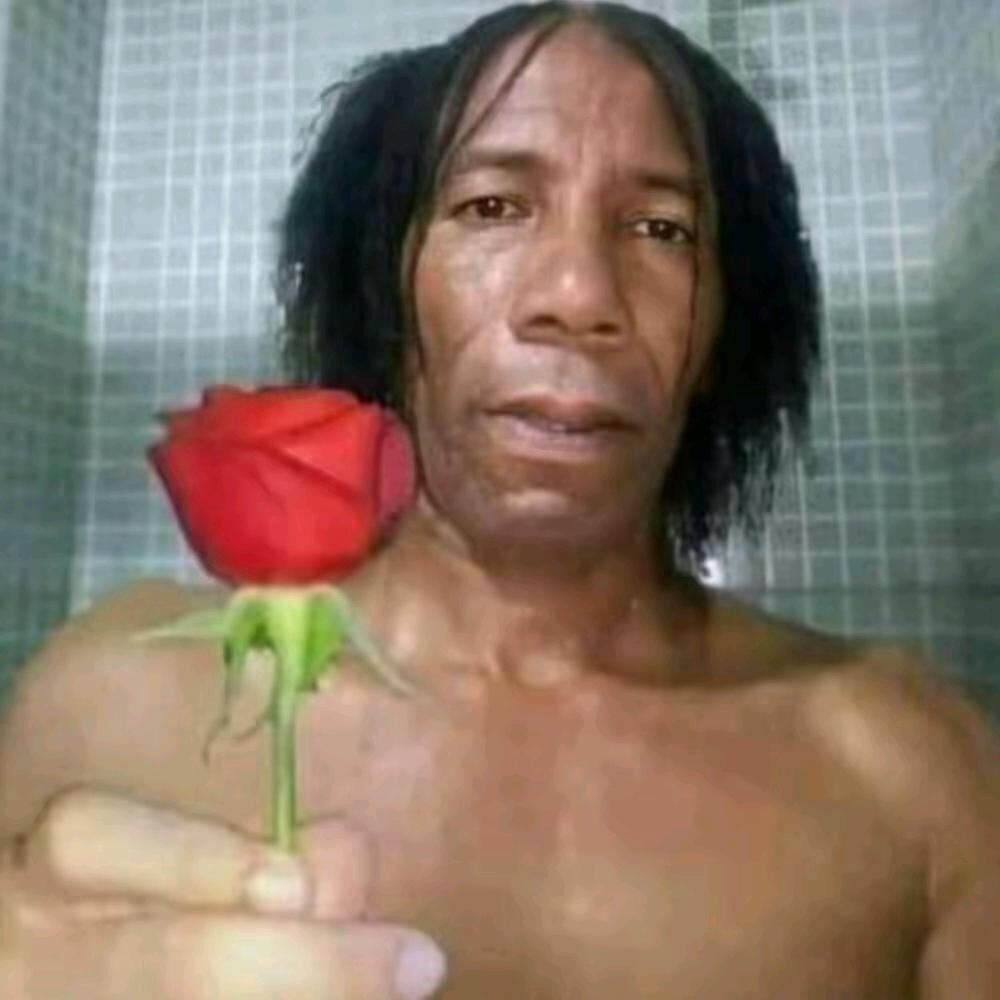